# Template Pipeline
Normalisation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**-**  
Imputation 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Outlier Detection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Z Score**  
Imputation 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Feature Selection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Implicit to model**  
Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Lasso Regression**


## Imports

In [ ]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, LassoCV, LassoLarsCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Custom
import sys,os
sys.path.append('/home/jovyan/work/AML/Task_1/Solution') # I would like a cleaner solution but works for now
import Components.Imputation as Imputation
import Components.Outlier_Detection_1D as Outlier_Detection_1D
import Components.Outlier_Detection_ND as Outlier_Detection_ND
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Imputation)
importlib.reload(Outlier_Detection_1D)
importlib.reload(Outlier_Detection_ND)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)

<module 'Components.data_fetching' from '/home/jovyan/work/AML/Task_1/Solution/Components/data_fetching.py'>

## Data Cleaning

### Import

In [ ]:
X, y = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()

In [ ]:
### First imputation


In [ ]:
missing_values = Imputation.missing_values_mask(X) # save which values were originally missing
X = Imputation.median(X)

### Outlier Detection

In [ ]:
X = Outlier_Detection_1D.z_score(X)
y = Outlier_Detection_1D.z_score(y)



In [ ]:
### Second imputation

In [ ]:
X = X.mask(missing_values)
X = Imputation.median(X,x_test)
y = Imputation.median(y)

## Model Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

### Simple

In [ ]:
#lasso = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(x_train, y_train)
#lasso = LassoCV(normalize=False, max_iter=1000).fit(x_train, y_train)

print('Train Score:')
y_pred_train = lasso.predict(x_train)
train_score = r2_score(y_train, y_pred_train)
print(train_score)

print('Test Score')
y_pred_test = lasso.predict(x_test)
test_score = r2_score(y_test, y_pred_test)
print(test_score)

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
Train Score:
0.09739767422358236
Test Score
0.17435265079299833


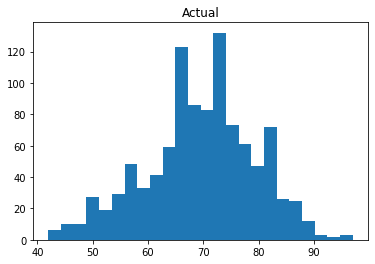

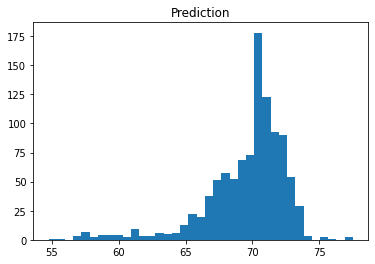

In [ ]:
plt.hist(y_train.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_train, bins='auto')
plt.title('Prediction')
plt.show()

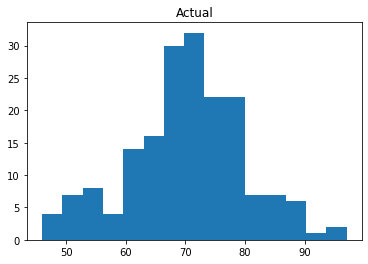

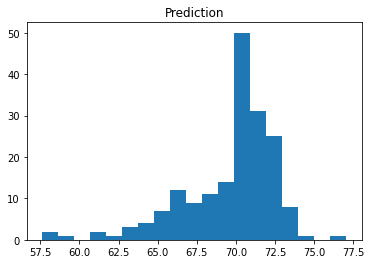

In [ ]:
plt.hist(y_test.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_test, bins='auto')
plt.title('Prediction')
plt.show()

### With Cross Validation

In [ ]:
lasso = LassoLarsCV(normalize = False)
#lasso = LassoCV(normalize=True, max_iter=1000, selection=random, normalize=True)
#lasso = Lasso(normalize=False, max_iter=1000, alpha=15000)
scores = cross_val_score(lasso, X, np.ravel(y), cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 291 iterations, alpha=2.828e+03, previous alpha=1.862e+02, with an active set of 234 regressors.
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 288 iterations, alpha=4.408e+03, previous alpha=1.721e+02, with an active set of 231 regressors.
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 224 iterations, alpha=3.241e+03, previous alpha=3.610e+02, with an active set of 201 regressors.
  ConvergenceW

In [ ]:
print(lasso.alpha)
coef = pd.DataFrame(lasso.coef_)
print(coef.where(coef!=0).count())

15000


AttributeError: 'Lasso' object has no attribute 'coef_'

## Final Prediction

/opt/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 419 iterations, alpha=2.164e+03, previous alpha=3.993e+01, with an active set of 338 regressors.
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 339 iterations, alpha=5.946e+03, previous alpha=7.765e+01, with an active set of 280 regressors.
  ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:604: C

(array([  5.,  10.,  51., 135., 225., 179., 112.,  45.,  11.,   3.]),
 array([51.12098913, 54.96955691, 58.81812469, 62.66669247, 66.51526025,
        70.36382804, 74.21239582, 78.0609636 , 81.90953138, 85.75809916,
        89.60666694]),
 <BarContainer object of 10 artists>)

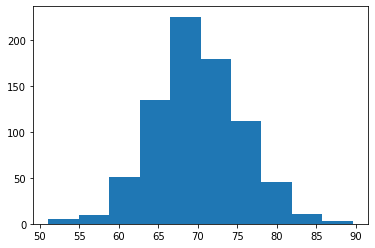

In [ ]:
#lasso_final = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(X,y)
#lasso_final = LassoCV(normalize=False, max_iter=1000).fit(X,y)
lasso_final = LassoLarsCV(normalize = False).fit(X, y)

x_test = data_fetching.get_test_data()
x_test = Imputation.mean(x_test)
# Note: They said no outliers were introduced in x_test so no need to perform outlier detection

y_pred = lasso_final.predict(x_test)
plt.hist(y_pred)



In [ ]:
y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/template_2.csv', index_label='id')

In [ ]:
coef = pd.DataFrame(lasso_final.coef_)
print(coef.where(coef!=0).count())

print("alpha")
print(lasso_final.alpha_)


0    61
dtype: int64
alpha
6660.004780217947
